*Filter Design Using the Helper Modules*

The Scipy package signal assists with the design of many digital filter types. As an alternative, here we explore the use of the filter design modules found in scikit-dsp-comm (https://github.com/mwickert/scikit-dsp-comm).

In this note we briefly explore the use of sk_dsp_comm.fir_design_helper and sk_dsp_comm.iir_design_helper. In the examples that follow we assume the import of these modules is made as follows:

#import sk_dsp_comm.fir_design_helper as fir_d
#import sk_dsp_comm.iir_design_helper as iir_d

The functions in these modules provide an easier and more consistent interface for both finte impulse response (FIR) (linear phase) and infinite impulse response (IIR) classical designs. Functions inside these modules wrap scipy.signal functions and also incorporate new functionality.

In [ ]:
# install modul scikit-dsp-comm
!-dpip install scikitsp-comm

In [ ]:
# Memuat modul-modul yang diperlukan dan menampilkan plot secara langsung di notebook
%pylab inline

# Mengimpor modul-modul yang diperlukan dari sk_dsp_comm package
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh

# Mengimpor modul scipy.signal sebagai signal
import scipy.signal as signal

# Mengimpor fungsi Audio dan display dari IPython.display
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

In [ ]:
# Mengimpor modul fir_design_helper dari paket sk_dsp_comm
import sk_dsp_comm.fir_design_helper as fir_d

# Mengimpor modul iir_design_helper dari paket sk_dsp_comm
import sk_dsp_comm.iir_design_helper as iir_d


Gambar ini menyajikan karakteristik respons amplitudo umum untuk empat jenis filter yang berbeda: lowpass, highpass, bandpass, dan bandstop. Berikut adalah penjelasan untuk setiap bagian dalam gambar:

1. **Filter Lowpass (Lowpass Filter)**

   - **Passband**: Wilayah di mana sinyal frekuensi rendah dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
   - **Stopband**: Wilayah di mana sinyal frekuensi tinggi diblokir atau mengalami penurunan amplitudo yang signifikan.
   - **Fc atau cutoff frequency**: Frekuensi batas yang memisahkan passband dan stopband.

2. **Filter Highpass (Highpass Filter)**

   - **Passband**: Wilayah di mana sinyal frekuensi tinggi dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
   - **Stopband**: Wilayah di mana sinyal frekuensi rendah diblokir atau mengalami penurunan amplitudo yang signifikan.
   - **Fc atau cutoff frequency**: Frekuensi batas yang memisahkan passband dan stopband.

3. **Filter Bandpass (Bandpass Filter)**

   - **Passband**: Wilayah di mana sinyal frekuensi tengah dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
   - **Stopband**: Wilayah di mana sinyal frekuensi tinggi dan rendah diblokir atau mengalami penurunan amplitudo yang signifikan.
   - **f1 dan f2**: Frekuensi batas yang memisahkan passband dan stopband.

4. **Filter Bandstop (Bandstop Filter)**

   - **Passband**: Wilayah di mana sinyal frekuensi tinggi dan rendah dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
   - **Stopband**: Wilayah di mana sinyal frekuensi tengah diblokir atau mengalami penurunan amplitudo yang signifikan.
   - **f1 dan f2**: Frekuensi batas yang memisahkan passband dan stopband.

Gambar ini membantu kita untuk memahami bagaimana setiap jenis filter bekerja dalam menyaring sinyal pada frekuensi tertentu, baik untuk membiarkannya melewati atau memblokirnya, tergantung pada kebutuhan aplikasi yang spesifik.

*Traditional IIR Filter Design using the Bilinear Transform*


The scipy.signal package fully supports the design of IIR digital filters from analog prototypes. IIR filters like FIR filters, are typically designed with amplitude response requirements in mind. A collection of design functions are available directly from scipy.signal for this purpose, in particular the function scipy.signal.iirdesign(). To make the design of lowpass, highpass, bandpass, and bandstop filters consistent with the module fir_design_helper.py the module iir_design_helper.py was written. Figure 2, below, details how the amplitude response parameters are defined graphically.

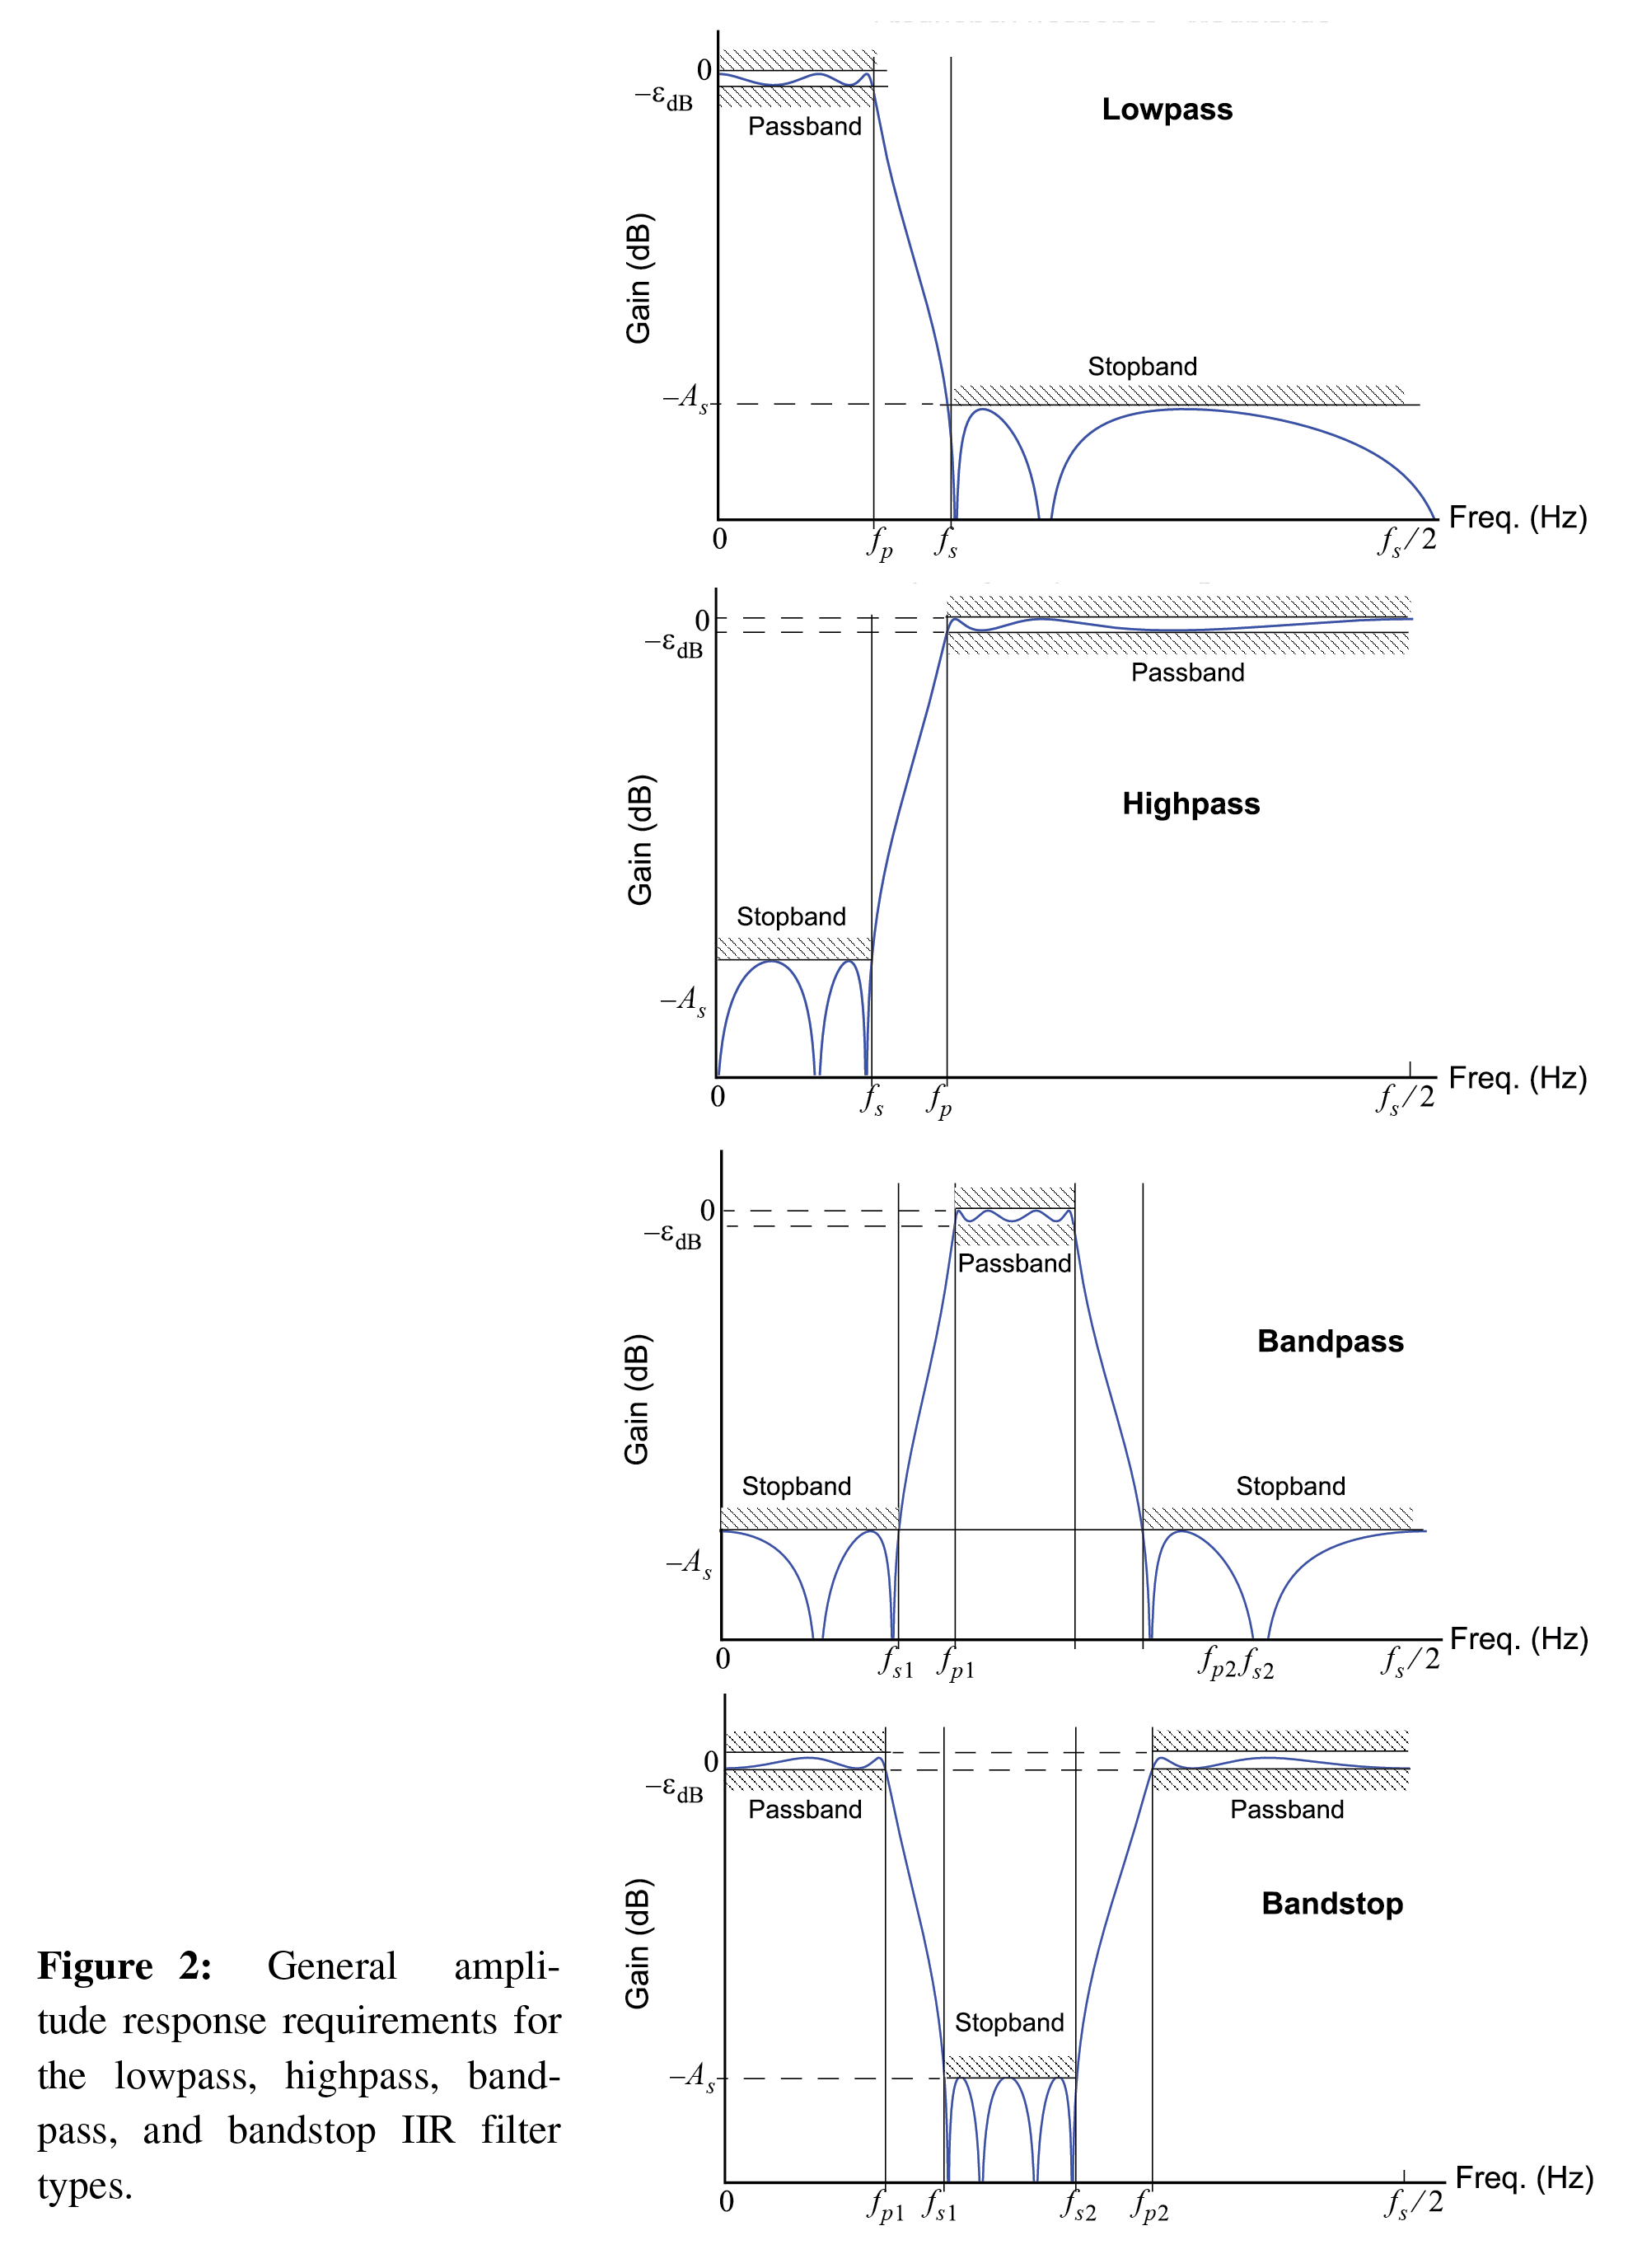

Gambar diatas adalah tentang respon amplitudo untuk berbagai jenis filter IIR (Infinite Impulse Response). Ini mencakup filter lowpass, highpass, bandpass, dan bandstop. Berikut adalah penjelasan untuk setiap jenis filter yang digambarkan:

1. **Lowpass (Filter Tapis Rendah)**:
   - **Tujuan**: Meneruskan frekuensi di bawah frekuensi cutoff (\( f_c \)) dan melemahkan frekuensi di atas frekuensi cutoff.
   - **Gambar Penjelasan**: Pada gambar lowpass, terlihat bahwa respon gain adalah konstan dan relatif tinggi pada frekuensi di bawah \( f_c \) (disebut sebagai passband) dan menurun drastis setelah melewati \( f_c \) (masuk ke stopband).

2. **Highpass (Filter Tapis Tinggi)**:
   - **Tujuan**: Meneruskan frekuensi di atas frekuensi cutoff (\( f_c \)) dan melemahkan frekuensi di bawah frekuensi cutoff.
   - **Gambar Penjelasan**: Pada gambar highpass, terlihat bahwa respon gain rendah di frekuensi rendah (stopband) dan mulai meningkat secara signifikan setelah melewati \( f_c \), pada frekuensi tinggi (passband).

3. **Bandpass (Filter Tapis Pita)**:
   - **Tujuan**: Meneruskan frekuensi dalam rentang tertentu (antara \( f_1 \) dan \( f_2 \)) dan melemahkan frekuensi di luar rentang ini.
   - **Gambar Penjelasan**: Pada gambar bandpass, terlihat bahwa ada dua frekuensi cutoff (\( f_1 \) dan \( f_2 \)). Respon gain tinggi di antara \( f_1 \) dan \( f_2 \) (passband), dan rendah di bawah \( f_1 \) dan di atas \( f_2 \) (stopband).

4. **Bandstop (Filter Tapis Notch)**:
   - **Tujuan**: Melemahkan frekuensi dalam rentang tertentu (antara \( f_1 \) dan \( f_2 \)) dan meneruskan frekuensi di luar rentang ini.
   - **Gambar Penjelasan**: Pada gambar bandstop, respon gain rendah antara \( f_1 \) dan \( f_2 \) (stopband), dan tinggi di luar frekuensi-frekuensi tersebut (termasuk pada kedua sisi passband di frekuensi rendah dan tinggi).



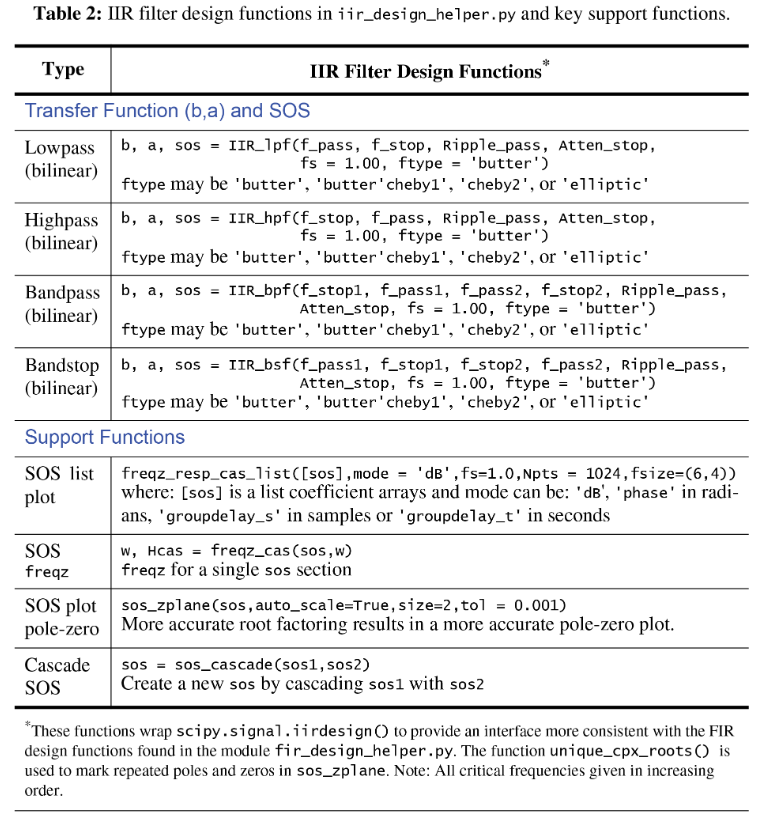

Gambar ini adalah tabel yang menjelaskan beberapa fungsi filter IIR (Infinite Impulse Response) dalam konteks program Python. Berikut rincian tabelnya:

### Table 2: IIR filter design functions in `iir_design_helper.py` and key support functions.

**Kolom:**

- **Type:** Jenis filter yang tersedia (lowpass, highpass, bandpass, atau bandstop).
- **IIR Filter Design Functions:** Berisi detail parameter dan contoh penggunaan fungsi untuk setiap jenis filter.

**Fungsi dan Deskripsinya:**

1. **Transfer Function (\(b, a\) and SOS):**
    - **Lowpass:** `b, a, sos = IIR_lowpass(ftype, f_pass, f_stop, Rp, Rs, fs, filter=None, output=’ba’ or ‘sos’, enable_debug=False)`
    - **Highpass:** `b, a, sos = IIR_highpass(ftype, f_pass, f_stop, Rp, Rs, fs, filter=2, output=’ba’, enable_debug=False)`
    - **Bandpass:** `b, a, sos = IIR_bandpass(ftype, f_pass1, f_pass2, f_stop1, f_stop2, Rp, Rs, fs, output=’ba’ , enable_debug=False, filter=2)`
    - **Bandstop:** `b, a="" = IIR_bandstop(ftype, f_stop2, f_pass2, f_stop1, f_stop1, Rp, Rs, fs, output=’ba’ , enable_debug=False, filter=2)`

**Parameter:**
- \(f_{\text{pass}}\): Frekuensi batas atas daerah passband.
- \(f_{\text{stop}}\): Frekuensi batas atas daerah stopband.
- Rp: Penyimpangan dalam passband.
- Rs: Redaman dalam stopband.
- fs: Frekuensi sampling.
- ftype: Types include 'butter', 'cheby1', 'cheby2', 'elliptic'.

**Key Support Functions:**
- **SOS list:** `sos = sosfreq_sos.lp(list([sos]), mode = 'dB', fs, otherwise)'
- **SOS freqz:** `sos.freqz = ('ba', filter, array.isTrue(True, 10000)` menggunakan 'imported.filters' ketitten samples inTrue),
- **SOS pole-zero:** `sos.zero = IIR_ba_zero` menunjukkan sebutan


In [ ]:
# Mendesain filter IIR low-pass dengan beberapa jenis filter (Butterworth, Chebyshev Type I,
# Chebyshev Type II, dan Elliptic) menggunakan fungsi IIR_lpf().
# Parameter-parameter yang diberikan adalah frekuensi passband (f_pass), frekuensi stopband (f_stop),
# ripple passband (0.5), jumlah taps (60), frekuensi sampling (fs), dan jenis filter ('butter', 'cheby1', 'cheby2', 'ellip').
fs = 48000
f_pass = 5000
f_stop = 8000
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

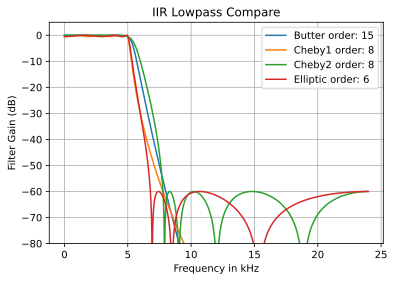

In [ ]:
# Memplot respons frekuensi dari filter IIR low-pass dengan berbagai jenis filter
# menggunakan fungsi freqz_resp_cas_list() dari paket iir_d.
# Parameter-parameter yang diberikan adalah daftar second-order sections (sos) dari masing-masing jenis filter,
# tipe respons (dB untuk respons dalam dB), dan frekuensi sampling (48 kHz).
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'IIR Lowpass Compare')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan urutan filter dan jumlah order untuk setiap jenis filter
legend((r'Butter order: %d' % (len(a_but) - 1),
        r'Cheby1 order: %d' % (len(a_cheb1) - 1),
        r'Cheby2 order: %d' % (len(a_cheb2) - 1),
        r'Elliptic order: %d' % (len(a_elli) - 1)), loc='best')

# Menampilkan grid pada plot
grid()

Gambar diatas adalah grafik perbandingan beberapa jenis filter lowpass IIR (Infinite Impulse Response). Grafik tersebut menggambarkan karakteristik tanggapan frekuensi dari berbagai filter lowpass.

Berikut adalah penjelasannya:

1. **Sumbu X (horizontal)**: Merepresentasikan frekuensi dalam kHz (kilohertz).

2. **Sumbu Y (vertikal)**: Merepresentasikan gain filter dalam dB (decibel), menunjukkan seberapa banyak sinyal dikuatkan atau dilemahkan pada frekuensi tertentu.

3. **Jenis-Jenis Filter yang Digunakan**:
   - **Butterworth (Butter) order: 15**: Digambarkan dengan garis biru.
   - **Chebyshev Type I (Cheby1) order: 8**: Digambarkan dengan garis oranye.
   - **Chebyshev Type II (Cheby2) order: 8**: Digambarkan dengan garis hijau.
   - **Elliptic order: 6**: Digambarkan dengan garis merah.

4. **Makna dari Grafik**:
   - **Filter Butterworth** memiliki tanggapan yang paling halus tanpa ripple di passband dan stopband. Namun, untuk mencapai ini, membutuhkan order yang lebih tinggi (15) untuk mencapai penurunan drastis yang sama.
   - **Filter Chebyshev Type I** menunjukkan ripple di passband tetapi memiliki penurunan yang lebih tajam dibandingkan Butterworth.
   - **Filter Chebyshev Type II** memiliki ripple di stopband tetapi tidak di passband, dan juga memiliki penurunan yang tajam.
   - **Filter Elliptic** memiliki ripple di kedua passband dan stopband tetapi memberikan penurunan yang paling tajam dan efektif dibandingkan filter lainnya dengan order yang lebih rendah (hanya 6).


(15, 15)

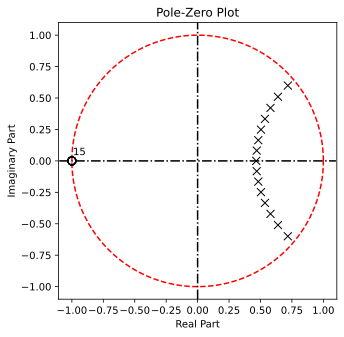

In [ ]:
# Menampilkan konfigurasi pole-zero dari filter IIR menggunakan metode sos_zplane()
# dari paket iir_d. Parameter yang diberikan adalah second-order sections (sos) dari filter Butterworth.
iir_d.sos_zplane(sos_but)

Gambar diatas adalah diagram tiang-nol (pole-zero plot) yang digunakan dalam analisis dan desain sistem kontrol serta sinyal digital. Diagram ini merupakan alat visual untuk mengevaluasi perilaku sistem berdasarkan lokasinya dalam domain z (transformasi z) atau domain s (transformasi Laplace). Berikut adalah penjelasannya:

1. **Sumbu X dan Sumbu Y**:
   - Sumbu X adalah bagian riil (Real Part).
   - Sumbu Y adalah bagian imajiner (Imaginary Part).

2. **Lingkaran Merah Putus-putus**:
   - Lingkaran merah putus-putus ini adalah lingkaran satuan yang penting dalam analisis sistem diskrit, terutama digunakan untuk mengevaluasi stabilitas sistem. Sistem adalah stabil jika semua tiang (poles) berada di dalam lingkaran satuan ini.

3. **Titik dengan Tanda X**:
   - Tanda X pada grafik menunjukkan lokasi tiang (poles) sistem. Di sini, kita melihat beberapa tiang yang terletak di sebelah kanan sumbu riil dalam lingkaran satuan. Lokasi ini menunjukkan karakteristik sistem, dan jika semua tiang berada di dalam lingkaran satuan, sistem tersebut stabil.

4. **Lingkaran Hitam Kecil dengan Titik**:
   - Lingkaran ini menunjukkan nol (zeros) dari sistem. Dalam diagram ini, terdapat satu nol pada posisi (-1, 0), yang berarti berada di sumbu riil pada -1.

5. **Garis Putus-putus Hitam**:
   - Garis putus-putus horizontal dan vertikal menunjukkan sumbu referensi untuk bagian riil (Real Part) dan bagian imajiner (Imaginary Part).

6. **Interpretasi**:
   - Diagram ini menunjukkan bahwa semua tiang (poles) berada di dalam lingkaran satuan yang menandakan bahwa sistem tersebut stabil. Selain itu, satu nol terletak di -1 pada sumbu riil.



In [ ]:
# Mendesain filter IIR low-pass menggunakan metode Elliptic
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1950 dan 2050),
# normalized band edges (0.5), jumlah taps (80), frekuensi sampling (8000 Hz), dan jenis filter ('ellip').
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Membuat filter IIR dengan metode multirate menggunakan fungsi multirate_IIR()
mr_lp = mrh.multirate_IIR(sos_lp)

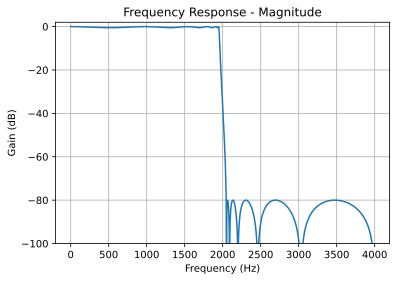

In [ ]:
# Menghitung respons frekuensi dari filter IIR menggunakan metode multirate
# Parameter-parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (8000 Hz).
mr_lp.freq_resp('db', 8000)

Gambar ini menunjukkan respons frekuensi dalam domain magnitudo dari sebuah filter. Pada sumbu horizontal (X) diukur frekuensi dalam Hertz (Hz), dan pada sumbu vertikal (Y) diukur gain atau penguatan dalam desibel (dB).

Berikut adalah penjelasan lebih rinci dari grafik ini:

1. **Respons Frekuensi Nyaman**:
   - Bagian awal grafik hingga sekitar 2000 Hz menunjukkan bahwa gain tetap konstan pada 0 dB, yang berarti sinyal melewati filter tanpa perubahan amplitudo. Ini merupakan band-pass area pertama atau passband dari filter tersebut.

2. **Penurunan Gain**:
   - Setelah 2000 Hz, gain mulai turun drastis mendekati -100 dB. Hal ini mengindikasikan bahwa filter tersebut menekan atau meredam sinyal di frekuensi-frekuensi ini, yang menunjukkan area stopband dari filter.

3. **Resonansi dan Fluktuasi**:
   - Pada rentang frekuensi antara sekitar 2200 Hz dan 2800 Hz terlihat beberapa puncak dan lembah, menunjukkan ada beberapa resonansi kecil yang terjadi di sekitar titik ini. Setelah itu, grafik stabil kembali pada level rendah.

Dari polanya, filter ini bisa merupakan tipe low-pass atau high-pass tergantung pada konteks yang diberikan. Namun, dari data yang diperlihatkan, frekuensi cut-off (titik dimana gain turun drastis) berada di sekitar 2000 Hz.


(-130.0, -30.0)

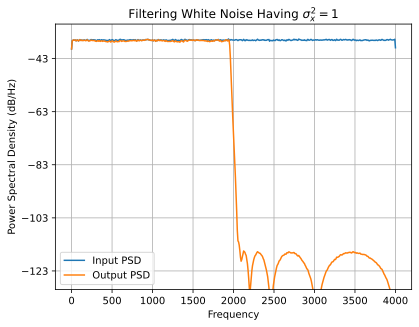

In [ ]:
# Menghasilkan 1 juta sampel data acak menggunakan fungsi randn()
x = randn(1000000)

# Memfilter data menggunakan filter multirate yang telah dibuat
y = mr_lp.filter(x)

# Menghitung dan memplot spektrum daya menggunakan fungsi psd()
# Parameter yang diberikan adalah data (x dan y), jumlah sampel FFT (2^10), dan frekuensi sampling (8000 Hz).
psd(x, 2**10, 8000)
psd(y, 2**10, 8000)

# Menambahkan judul pada plot
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Menambahkan legenda dengan label 'Input PSD' dan 'Output PSD' pada lokasi terbaik
legend(('Input PSD', 'Output PSD'), loc='best')

# Mengatur batas sumbu y dari -130 hingga -30
ylim([-130, -30])

Gambar ini menunjukkan grafik dari sebuah analisis spektral.

**Judul:** Filtering White Noise Having σ_x² = 1

**Deskripsi Grafik:**
- **Sumbu Horizontal (x):** merepresentasikan frekuensi.
- **Sumbu Vertikal (y):** merepresentasikan Power Spectral Density (PSD) dalam dB/Hz.

**Plot:**
- **Garis Biru (Input PSD):** Menunjukkan spektral densitas daya dari sinyal masukan white noise dengan variansi, σ_x² = 1. Seperti yang terlihat, garis ini relatif konstan pada sekitar -43 dB/Hz, yang merupakan karakteristik white noise (spektrum datar).
- **Garis Oranye (Output PSD):** Menunjukkan spektral densitas daya dari sinyal keluaran setelah white noise tersebut di-filter.

**Observasi:**
- Pada frekuensi di sekitar 2000, terdapat penurunan tajam di Power Spectral Density dari sinyal keluaran, yang mengindikasikan bahwa filter yang digunakan memiliki sifat menekan (mengurangi kekuatan) komponen frekuensi pada kisaran tersebut.
- Setelah titik tersebut, terdapat beberapa anomali di sekitar 2500 hingga 4000, yang berkaitan dengan keefektifan filter pada frekuensi tinggi.


In [ ]:
# Menentukan frekuensi sampling
fs = 8000

# Menghitung dan mencetak PSD yang diharapkan dalam satuan dB/Hz menggunakan rumus 10*log10(fs)
print('Expected PSD of %2.3f dB/Hz' % (0 - 10 * log10(fs),))

Expected PSD of -39.031 dB/Hz


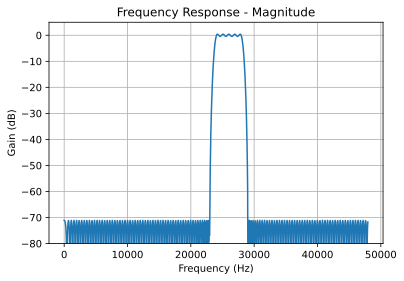

In [ ]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();

Gambar ini menunjukkan respons frekuensi dari suatu sistem dengan memperlihatkan magnitudo atau gain dalam skala desibel (dB) terhadap frekuensi dalam Hertz (Hz).

### Penjelasan Gambar:
1. **Sumbu Y (Gain dalam dB):**
   - Sumbu vertikal menunjukkan gain (penguatan) dalam desibel (dB). Nilai yang lebih tinggi menunjukkan penguatan yang lebih besar.

2. **Sumbu X (Frekuensi dalam Hz):**
   - Sumbu horizontal menunjukkan frekuensi dalam Hertz (Hz). Frekuensi diukur dari 0 Hz hingga 50.000 Hz.

3. **Bentuk Kurva:**
   - Kurva menunjukkan bagaimana gain sistem berubah seiring dengan frekuensi. Kurva memiliki dua bagian utama:
     - **Rentang Frekuensi Interes (Passband):** Pada frekuensi sekitar 20.000 Hz hingga 30.000 Hz, gain mendekati 0 dB, menunjukkan bahwa frekuensi-frekuensi ini diteruskan oleh sistem tanpa banyak attenuasi (pengurangannya sangat kecil).
     - **Rentang yang di-attenuasi (Stopband):** Di luar rentang 20.000 Hz hingga 30.000 Hz, gain turun drastis hingga sekitar -80 dB, menunjukkan bahwa frekuensi-frekuensi ini sangat di-attenuasi oleh sistem.

### Interpretasi:
- **Passband (Rentang Lewat):** Frekuensi antara 20.000 Hz hingga 30.000 Hz adalah frekuensi yang diteruskan dengan gain minimal (sekitar 0 dB). Sistem ini berfungsi sebagai filter pita (bandpass filter) yang memungkinkan lewatnya frekuensi dalam rentang ini.
- **Stopband (Rentang Tertahan):** Frekuensi di bawah 20.000 Hz dan di atas 30.000 Hz attenuasi sangat besar (sekitar -80 dB), yang menunjukkan bahwa sistem tersebut tidak memungkinkan frekuensi-frekuensi ini untuk lewat.


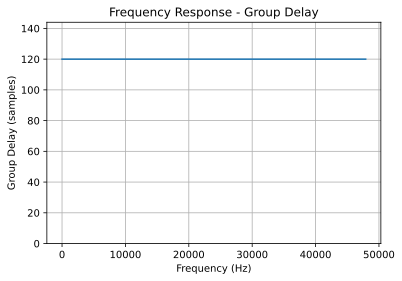

In [ ]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Gambar yang Anda berikan merupakan grafik "Frequency Response - Group Delay" (Respons Frekuensi - Delay Grup).

**Penjelasan Gambar:**

1. **Sumbu X (Horizontal):**
   - Menunjukkan frekuensi dalam satuan Hertz (Hz).
   - Rentang frekuensi dari 0 hingga 50,000 Hz.

2. **Sumbu Y (Vertikal):**
   - Menunjukkan group delay dalam satuan sampel.
   - Rentangnya dari 0 hingga sekitar 140 sampel.

3. **Garis Biru Horizontal:**
   - Menunjukkan bahwa group delay konstan pada nilai sekitar 120 sampel di seluruh rentang frekuensi yang ditunjukkan.
   - Tidak ada perubahan di group delay terlepas dari frekuensi.


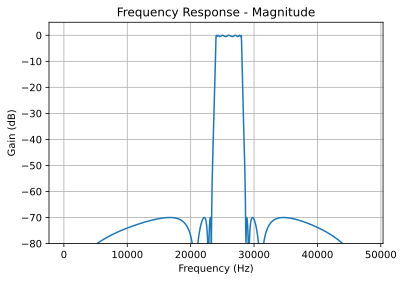

In [ ]:
# Merancang filter band-pass menggunakan metode IIR elliptic
b_rec_bpf2, a_rec_bpf2, sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                     0.5,70,96000,'ellip')

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
with np.errstate(divide='ignore'):  # Mengabaikan pembagian dengan nol yang mungkin terjadi
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();


Gambar yang Anda lampirkan adalah sebuah plot yang menunjukkan respon frekuensi dari suatu sistem atau filter, khususnya represen dari magnitudo respon frekuensinya. Berikut adalah penjelasan mengenai berbagai elemen pada gambar tersebut:

1. **Judul Plot**: "Frequency Response - Magnitude". Ini mengindikasikan bahwa plot ini memuat informasi tentang bagaimana besar sinyal (dB) berubah seiring dengan frekuensi (Hz).

2. **Sumbu X (Frekuensi)**: Sumbu ini menunjukkan frekuensi dalam satuan Hertz (Hz), berkisar dari 0 hingga 50,000 Hz. Ini adalah berbagai frekuensi yang diinputkan ke dalam sistem atau filter.

3. **Sumbu Y (Gain)**: Sumbu ini menunjukkan gain dalam satuan desibel (dB), berkisar dari -80 dB hingga 20 dB. Gain ini mengukur seberapa banyak sinyal diperkuat atau dilemahkan oleh sistem pada setiap frekuensi tertentu.

4. **Kurva Respon Frekuensi**: Kurva yang ditampilkan menunjukkan bagaimana gain sistem bervariasi dengan frekuensi yang diinputkan.

   - Pada frekuensi sekitar 25,000 hingga 30,000 Hz, gain hampir konstan pada nilai sekitar 0 dB, yang menunjukkan bahwa sistem ini memungkinkan frekuensi dalam rentang ini untuk melewati hampir tanpa pelemahan atau penguatan yang signifikan.
   - Di luar rentang frekuensi tersebut, gain turun secara signifikan, menggambarkan bahwa sistem atau filter ini sangat membatasi sinyal pada frekuensi di luar rentang tersebut. Penurunan gain yang tajam ini menunjukkan filter bandpass yang memungkinkan frekuensi tertentu untuk melewati dan meredam frekuensi di luar rentang tersebut.



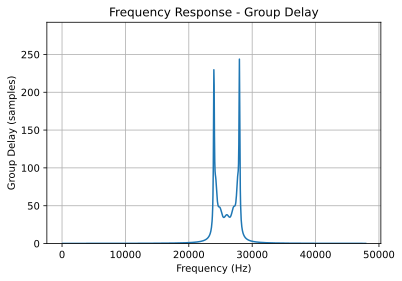

In [ ]:
# Mengatur penanganan peringatan ketika terjadi pembagian dengan nol atau nilai yang tidak valid
with np.errstate(divide='ignore', invalid='ignore'):
    # Memplot respons frekuensi filter dalam bentuk delay kelompok (group delay)
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Gambar ini adalah representasi dari respon frekuensi dalam bentuk "Group Delay". Berikut adalah penjelasan dari elemen-elemen yang ada pada grafik ini:

1. **Judul:** "Frequency Response - Group Delay"
   - Menunjukkan bahwa grafik ini memperlihatkan respon frekuensi dalam hal delay grup.

2. **Sumbu Horizontal (x-axis):** Frekuensi (dalam Hertz)
   - Menampilkan rentang frekuensi dari 0 hingga 50,000 Hz.

3. **Sumbu Vertikal (y-axis):** Group Delay (dalam sampel)
   - Mengukur delay grup dalam satuan sampel, dengan nilai berkisar dari 0 hingga 250 sampel.

4. **Kurva:** Garis yang berfluktuasi
   - Kurva ini menunjukkan bagaimana delay grup berubah seiring perubahan frekuensi. Hal ini bisa berarti bagaimana respon sebuah sistem atau filter terhadap input frekuensi yang berbeda dalam hal delay.

Secara spesifik:
- Terdapat dua puncak visual utama pada frekuensi sekitar 25,000 Hz hingga 30,000 Hz.
- Delay grup meningkat drastis dan mencapai puncak sekitar frekuensi tersebut, lalu kembali turun.